<a href="https://colab.research.google.com/github/inashellshelley/MLresearchOnlineRetailII/blob/main/CA_ML1_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applying Classifiers on Online Retail-II Dataset to understand the behavior of different models through metrics evaluation **

**ML CA RESEARCH PAPER** by
Name: Shalini Guha
Registration number: 12107495


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/online_retail_II.xlsx')
print(df)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [ ]:
df.shape

(525461, 8)

In [ ]:
df.size

4203688

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.drop(columns=['InvoiceDate'],axis=1)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,17530.0,United Kingdom


In [ ]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
df['Customer ID'].fillna(df['Customer ID'].mean(), inplace=True)

In [ ]:
df.isna().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))

In [ ]:
print(df.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [ ]:
for i in [0,1,2]:
    df[i] = df[i].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
for i in [0, 1, 2, 4, 7]:
      df[i] = LabelEncoder().fit_transform(df[i])
target = df[7]
data = df.drop(columns=[7])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_lr = LogisticRegression(max_iter=3000)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [ ]:
model_lr.fit(x_train, y_train)
model_knn.fit(x_train, y_train)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
pred_lr_train = model_lr.predict(x_train)
pred_lr_test = model_lr.predict(x_test)

In [ ]:
pred_knn_train = model_knn.predict(x_train)
pred_knn_test = model_knn.predict(x_test)

In [ ]:
pred_dt_train = model_dt.predict(x_train)
pred_dt_test = model_dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_lr_train = accuracy_score(y_train, pred_lr_train)
accuracy_lr_test = accuracy_score(y_test, pred_lr_test)

accuracy_knn_train = accuracy_score(y_train, pred_knn_train)
accuracy_knn_test = accuracy_score(y_test, pred_knn_test)

accuracy_dt_train = accuracy_score(y_train, pred_dt_train)
accuracy_dt_test = accuracy_score(y_test, pred_dt_test)

In [ ]:
precision_lr_test = precision_score(y_test, pred_lr_test, average='weighted')
recall_lr_test = recall_score(y_test, pred_lr_test, average='weighted')
f1_lr_test = f1_score(y_test, pred_lr_test, average='weighted')

In [ ]:
precision_knn_test = precision_score(y_test, pred_knn_test, average='weighted')
recall_knn_test = recall_score(y_test, pred_knn_test, average='weighted')
f1_knn_test = f1_score(y_test, pred_knn_test, average='weighted')

In [ ]:
precision_dt_test = precision_score(y_test, pred_dt_test, average='weighted')
recall_dt_test = recall_score(y_test, pred_dt_test, average='weighted')
f1_dt_test = f1_score(y_test, pred_dt_test, average='weighted')

In [ ]:
from sklearn.model_selection import GridSearchCV
params_lr = {'C': [0.01, 0.1, 1]}
params_knn = {'n_neighbors': [3, 5, 7, 9]}
params_dt = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}

In [ ]:
grid_lr = GridSearchCV(model_lr, params_lr, cv=5)
grid_knn = GridSearchCV(model_knn, params_knn, cv=5)
grid_dt = GridSearchCV(model_dt, params_dt, cv=5)

In [ ]:
grid_lr.fit(x_train, y_train)
grid_knn.fit(x_train, y_train)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
print("Logistic Regression: best hyperparameters: ", grid_lr.best_params_)
print("test accuracy: ", grid_lr.score(x_test, y_test))

print("KNearest Neighbors: best hyperparameters: ", grid_knn.best_params_)
print("test accuracy: ", grid_knn.score(x_test, y_test))

print("Decision Tree: best hyperparameters: ", grid_dt.best_params_)
print("test accuracy: ", grid_dt.score(x_test, y_test))

Logistic Regression: best hyperparameters:  {'C': 1}
test accuracy:  0.9315588147603068
KNearest Neighbors: best hyperparameters:  {'n_neighbors': 7}
test accuracy:  0.9398118485907675
Decision Tree: best hyperparameters:  {'max_depth': 8, 'min_samples_split': 2}
test accuracy:  0.984007764576025


In [ ]:
print("Logistic Regression:")
print("Training Accuracy:", accuracy_lr_train)
print("Testing Accuracy:", accuracy_lr_test)
print("Precision:", precision_lr_test)
print("Recall:", recall_lr_test)
print("F1-score:", f1_lr_test)
print()

Logistic Regression:
Training Accuracy: 0.931551130709963
Testing Accuracy: 0.9317808410355305
Precision: 0.8803555348456912
Recall: 0.9317808410355305
F1-score: 0.9050046032802481



In [ ]:
print("K-Nearest Neighbors:")
print("Training Accuracy:", accuracy_knn_train)
print("Testing Accuracy:", accuracy_knn_test)
print("Precision:", precision_knn_test)
print("Recall:", recall_knn_test)
print("F1-score:", f1_knn_test)
print()

K-Nearest Neighbors:
Training Accuracy: 0.9567317887456432
Testing Accuracy: 0.9398625974536758
Precision: 0.930121911187346
Recall: 0.9398625974536758
F1-score: 0.9330156980453245



In [ ]:
print("Decision Tree:")
print("Training Accuracy:", accuracy_dt_train)
print("Testing Accuracy:", accuracy_dt_test)
print("Precision:", precision_dt_test)
print("Recall:", recall_dt_test)
print("F1-score:", f1_dt_test)
print()

Decision Tree:
Training Accuracy: 0.9412378813665305
Testing Accuracy: 0.9411820678892914
Precision: 0.8991941904404054
Recall: 0.9411820678892914
F1-score: 0.9181997418235335



In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = ['Precision', 'Recall', 'F1-score']
x = np.arange(len(models))

In [ ]:
accuracy_values = [accuracy_lr_test, accuracy_knn_test, accuracy_dt_test]
precision_values = [precision_lr_test, precision_knn_test, precision_dt_test]
recall_values = [recall_lr_test, recall_knn_test, recall_dt_test]
f1_values = [f1_lr_test, f1_knn_test, f1_dt_test]

In [ ]:
import matplotlib.pyplot as plt

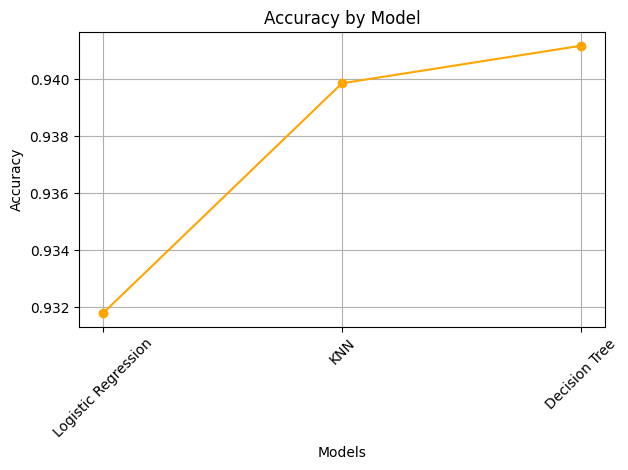

In [ ]:
plt.plot(models, accuracy_values, marker='o', color='orange', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Precision by Model')

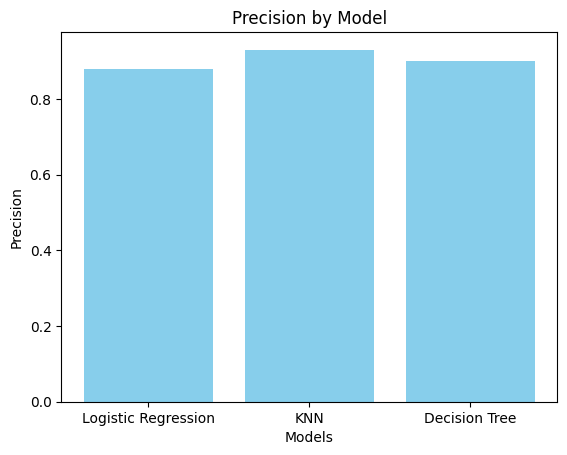

In [ ]:
plt.bar(x, precision_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(x, models)
plt.title('Precision by Model')

Text(0.5, 1.0, 'Recall by Model')

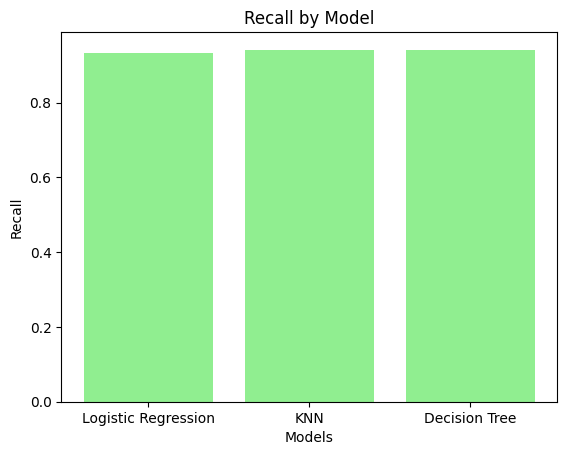

In [ ]:
plt.bar(x, recall_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(x, models)
plt.title('Recall by Model')

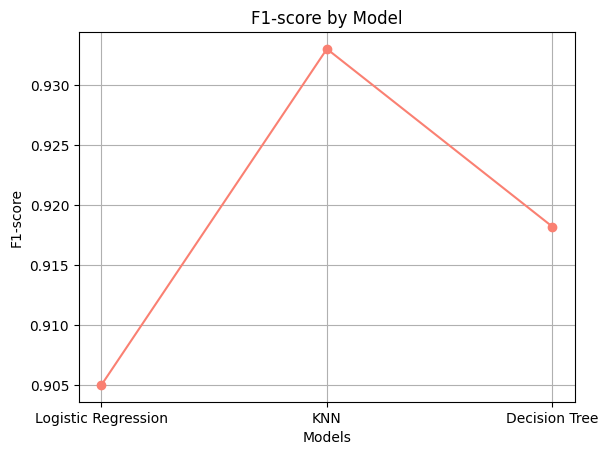

In [ ]:
plt.plot(models, f1_values, marker='o', color='salmon', linestyle='-')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score by Model')
plt.grid(True)
plt.show()

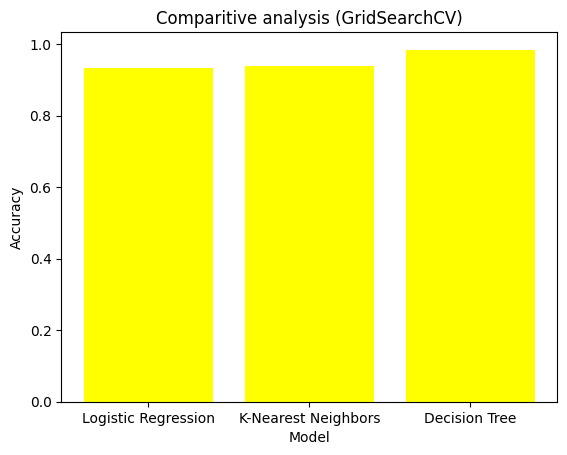

In [ ]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']
accuracies = [0.9315588147603068, 0.9398118485907675, 0.984007764576025]
plt.bar(models, accuracies, color='yellow')
plt.title('Comparitive analysis (GridSearchCV)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()